In [1]:
ClearAll["Global`*"];

In [2]:
(* Import FEM solver and set c constant *)
<< NDSolve`FEM`
c = QuantityMagnitude[StandardAtmosphereData[Quantity[0, "Meter"], "SoundSpeed"]]

340.29

Out[6]:
 
 
 
 
 Out[8]:
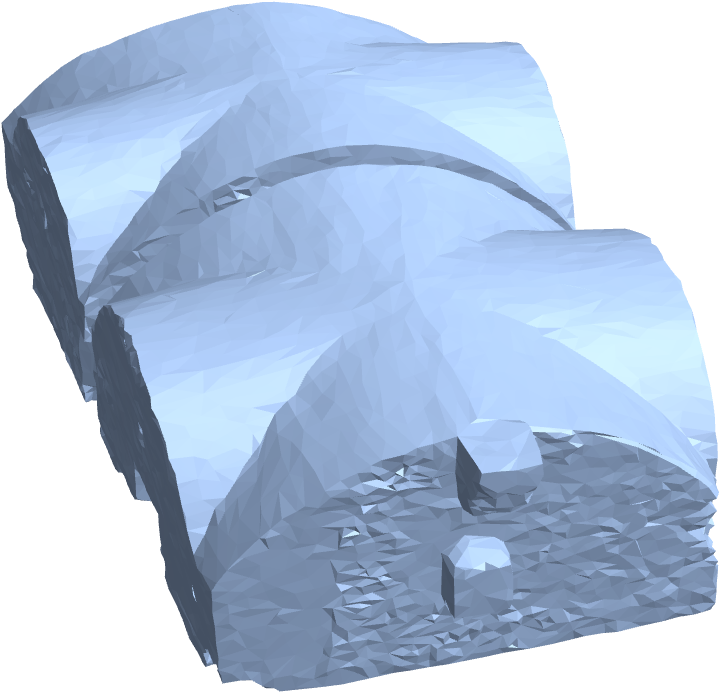
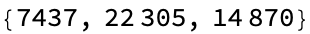

In [5]:
(* Import model and fix it *)
data = Import["../data/models/datinis/datini_rotate.stl"]
model = RepairMesh[data];
MeshCellCount[model]

In [9]:
(* 1. Calculate boundary mesh, 2. generate FEM mesh, 3. transform to a region *)
bm = ToBoundaryMesh[model];

mesh = ToElementMesh[bm, MeshQualityGoal -> "Maximal",
                        MaxCellMeasure -> {"Volume" -> 0.01}];

reg = MeshRegion[mesh];
MeshCellCount[reg];

emesh = Graphics3D[{Opacity[0.2], reg}, ImageSize -> Medium, ViewVector -> {10, 45, 30}, Boxed -> False];
(*Export["../data/models/datinis/datini_emesh.tiff", emesh, ImageResolution -> 720];*)

(*rModel = GeometricTransformation[mesh, RotationTransform[125 Degree, {1, 0, 0}]];*)

Out[21]:
 
 
 
 
 Out[23]:
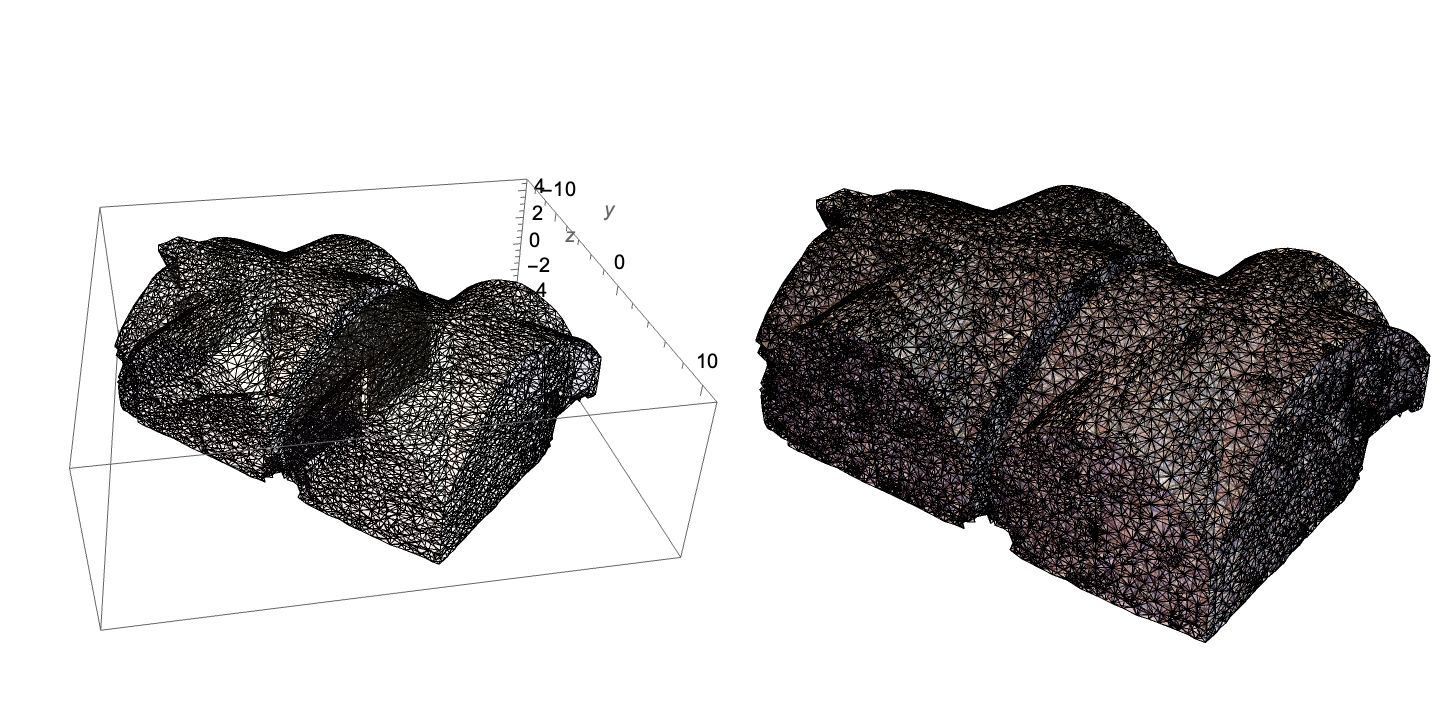
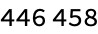

In [20]:
(* Display imported model, FEM mesh and report the nr. of elements in it *)
Grid[{{Graphics3D[{Opacity[0.1], model}, ImageSize -> Medium, Axes -> True,
                    AxesLabel -> {x, y, z}, ViewVector -> {10, 45, 30}],
                    Graphics3D[{Opacity[0.25], reg}, ImageSize -> Medium, ViewVector -> {10, 45, 30}, Boxed -> False]}}]
                    
MeshCellCount[reg, 3]

Eigensystem::maxit2: 
 Warning: maximum number of iterations, 2000, has been reached by the
 Arnoldi algorithm without convergence to the specified tolerance, but the
 current best computed value has been returned. You can use method options
 with Method -> {Arnoldi, opts} to increase the size of basis vectors, the
 maximum number of iterations, reduce the tolerance, or use an estimate as
 a shift, any of which may help.
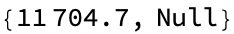

In [24]:
(* Set and solve the eigenvalue problem: solve for the first nmodes and report computation time *)
nmodes = 100;

opts = {MaxIterations -> 2000, Tolerance -> 1*^-4};

AbsoluteTiming[{lambda, eigfuns} = NDEigensystem[{-Laplacian[{u[x, y, z]}, {x, y, z}]}, u[x, y, z], 
            Element[{x, y, z}, reg], nmodes, Method -> {"Arnoldi", opts}];]


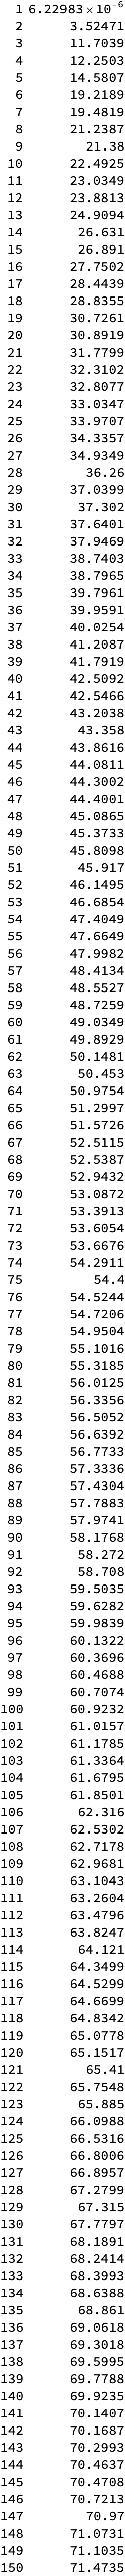

In [30]:
(* Convert eigenvalues into mode frequencies *)
Grid[Transpose[{Range[nmodes], freqs = c * Sqrt[lambda] / (2 * Pi)}], Alignment -> Right]

In [117]:
(* Select a frequency range *)

minFreq = 40;
maxFreq = 80;

filteredFreqs = Select[freqs, minFreq <= # <= maxFreq &];

In [153]:
(* Select a minimum distance in hertz between 2 consecutives modes *)

minDist = 5;

(* Set a function that adds a frequency to the list only if it is sufficiently distant from all the already selected frequencies *)
addIfDistant[freqs_, newFreq_] := 
  If[Min[Abs[freqs - newFreq]] >= minDist, Append[freqs, newFreq], freqs]

(* Use FoldList to apply this function to each frequency in the filtered list, accumulating the selected frequencies *)
selectedFreqs = FoldList[addIfDistant, {}, filteredFreqs]

(* Use Select to find the indices of the selected frequencies *)
(*selectedIndices = Select[Range[Length[filteredFreqs]], MemberQ[selectedFreqs, filteredFreqs[[#]]]&]*)

selectedModes = Last[selectedFreqs]

Out[161]:
 
 
 {{}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3696, 65.41}, {40.0254, 45.0865, 50.1481, 55.3185, 60.3


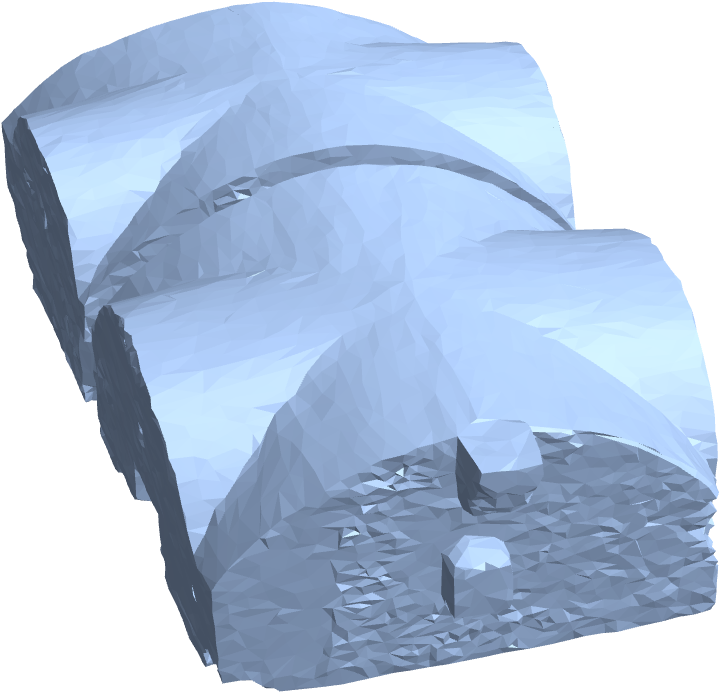

In [33]:
(* Visualise room modes: plot mode shapes with density plot *)
mmodel = MeshRegion[MeshOrderAlteration[mesh, 1]]

In [169]:
(* Calculate the eigenfunctions for a given time range *)
timeRange = {0, 0.1}; (* For example, 250 ms *)
eigenfunctionsTime = Table[
    NDSolveValue[{D[u[t, x, y, z], t] == -lambda[[i]]*eigfuns[[i]][x, y, z], u[0, x, y, z] == eigfuns[[i]][x, y, z]}, 
    u, {t, timeRange[[1]], timeRange[[2]]}, {x, y, z} ∈ reg],
    {i, selectedModes}];

In [1]:
(* Calculate the energy for each mode and its decay *)
energies = Table[
    Integrate[(eigenfunctionsTime[[i]][t, x, y, z])^2, {t, timeRange[[1]], timeRange[[2]]}, {x, y, z} ∈ reg],
    {i, selectedModes}];

In [3]:
(* Calculate the backward integral of the energy for each mode *)
reverseEnergies = Table[
    Integrate[(energies[[i]])^2, {t, timeRange[[2]], timeRange[[1]]}, {x, y, z} ∈ reg],
    {i, selectedModes}];

In [5]:
(* Calculate the decay time T60 for each mode using the Schroeder method *)
t60 = Table[
    FindRoot[10*Log10[reverseEnergies[[i]]/energies[[i]]] == -60, {t, timeRange[[2]]/2, timeRange[[1]], timeRange[[2]]}],
    {i, selectedModes}
];

Print[t60]

                        reverseEnergies[[i]]
Table[FindRoot[10 Log10[--------------------] == -60, 
                           energies[[i]]
 
         timeRange[[2]]
>    {t, --------------, timeRange[[1]], timeRange[[2]]}], {i, selectedModes}]
               2


In [9]:
(* Calculate the linear amplitude gain for each mode *)
linearGain = energies; (* If the input energy is 1 *)

Print[linearGain]

In [11]:
(* Calculate the maximum amplitude for each mode *)
maxAmplitudes = Table[
    FindMaximum[Abs[eigenfunctionsTime[[i]][t, x, y, z]], {t, timeRange[[1]], timeRange[[2]]}, {x, y, z} ∈ reg],
    {i, selectedModes}
];

Print[maxAmplitudes]

Table[FindMaximum[Abs[eigenfunctionsTime[[i]][t, x, y, z]], 
 
>    {t, timeRange[[1]], timeRange[[2]]}, {x, y, z} \[Element] reg], 
 
>   {i, selectedModes}]


{2355.89, Null}
../data/models/datinis/datini_denplot.tiff
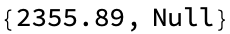
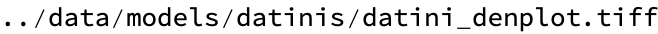

In [50]:
mode = 8;

AbsoluteTiming[denplot = DensityPlot3D[eigfuns[[mode]], Element[{x, y, z}, mmodel],
                        ColorFunction -> ColorData["NeonColors"], Axes -> False,
                        ImageSize -> Medium, ViewVector -> {10, 45, 30}, Boxed -> False];]

Export["../data/models/datinis/datini_denplot.tiff", denplot, ImageResolution -> 720]